project/

├── IMG/                            
├── robot_log_updated_path.xlsx        
└── HW3.py     

Objective: Train a CNN using the image as input, and SteerAngle + Throttle as the output.

Task 4
Create erratic dataset and working on it. 
1. prepare the excel file as we had to split the colums.
2. prepare the 1st column of excel based on image path as we are working on GPU
3. install necessary packages
4. from excel file it will take the images, it will preprocess image
5. CNN training
6. Model evaluation on erratic dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 63.0 MB 3.0 MB/s eta 0:00:01
  distutils: /home/angona3/.local/lib/python3.9/site-packages
  sysconfig: /home/angona3/.local/lib64/python3.9/site-packages
  user = True
  home = None
  root = None
  prefix = None
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

^C
Traceback (most recent call last):
  File "/usr/lib64/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib64/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.9/site-packages/pip/__main__.py", line 29, in <module>
    from pip._internal.cli.main import main as _main
  File "/usr/lib/python3.9/site-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/lib/python3.9/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/lib/python3.9/site-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/lib/python3.9/site-packages/pip/_internal/cli/cmdoptions.py", line 24, in <module>
    from pip._internal.cli.progress_bars import BAR_TYPES
  File "

In [4]:
pip uninstall -y tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 644.8 MB 24 kB/s /s eta 0:00:01��███████▎     | 528.5 MB 104.8 MB/s eta 0:00:02
     |████████████████████████████████| 5.9 MB 108.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 120.1 MB/s eta 0:00:01
     |████████████████████████████████| 135 kB 142.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 10.4 MB/s  eta 0:00:01
     |████████████████████████████████| 24.5 MB 96.5 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 1.4 MB/s s eta 0:00:01
     |████████████████████████████████| 5.1 MB 45.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 138.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 43.2 MB/s eta 0:00:01
     |████████████████████████████████| 319 kB 82.9 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 405 kB/s s eta 0:00:01
     |████████████████████████████████

In [38]:
pip install git+https://github.com/tensorflow/tensorflow.git#tensorflow-gpu

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/tensorflow/tensorflow.git to /tmp/pip-req-build-xw0vag5r
  Running command git clone -q https://github.com/tensorflow/tensorflow.git /tmp/pip-req-build-xw0vag5r
  Resolved https://github.com/tensorflow/tensorflow.git to commit c300b7dece76084bc25ff1a5c4e2a47cab6f57b0
ERROR: File "setup.py" not found for legacy project git+https://github.com/tensorflow/tensorflow.git#tensorflow-gpu.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda install cudatoolkit cudnn

In [4]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 250 kB 3.1 MB/s eta 0:00:01
  distutils: /home/angona3/.local/lib/python3.9/site-packages
  sysconfig: /home/angona3/.local/lib64/python3.9/site-packages
  user = True
  home = None
  root = None
  prefix = None
Note: you may need to restart the kernel to use updated packages.


In [51]:
!pip uninstall tensorflow tensorflow-gpu keras keras-nightly tf-nightly -y




Found existing installation: keras 3.9.2
Uninstalling keras-3.9.2:
  Successfully uninstalled keras-3.9.2


In [52]:
!pip cache purge

Files removed: 159


In [58]:
!pip install tensorflow==2.15


Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.15.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
  distutils: /home/angona3/.local/lib/python3.9/site-packages
  sysconfig: /home/angona3/.local/lib64/python3.9/site-packages
  user = True
  home = None
  root = None
  prefix = None


In [59]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2025-04-09 15:19:51.352352: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-09 15:19:51.352442: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-09 15:19:51.385349: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-09 15:19:51.454845: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-09 15:19:52.718740: W tensorflow/compiler/tf2

2.15.0
[]


**Task 4** : Collected another dataset with more erratic navigation

In [60]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

Data Loading and Preprocessing

In [63]:
# Load the cleaned Excel
df = pd.read_excel("/work/mech-ai/angona3/project/robot_log_updated_paths.xlsx") #we have to add our excel path

# Extract paths and targets
image_paths = df["Path"].values
steer = df["SteerAngle"].astype(float).values
throttle = df["Throttle"].astype(float).values

# Normalize steering and throttle
steer = steer / 25.0  # if range is approx -25 to 25
throttle = throttle / 1.0  # if range is 0 to 1

# Load images and resize
def load_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (320, 160))  # keeping original image size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img / 255.0  # Normalize to [0, 1]
    
# imgs = [path.split('/')[-2]+'/'+path.split('/')[-1] for path in image_paths]
# test = load_image('IMG/robocam_2025_04_03_19_07_07_216.jpg')
X = np.array([load_image(p) for p in image_paths])
y = np.stack((steer, throttle), axis=1)

In [64]:
ls

erratic_robot_log_cleaned.xlsx  robot_log_cleaned.xlsx
HW3.ipynb                       robot_log_updated_paths.xlsx
IMG/


Train-Test Split 
Training-Validation 80%

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CNN Model

In [66]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [67]:
model = Sequential([
    Input(shape=(160, 320, 3)),
    Conv2D(24, (5, 5), strides=(2, 2), activation='relu'),
    Conv2D(36, (5, 5), strides=(2, 2), activation='relu'),
    Conv2D(48, (5, 5), strides=(2, 2), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='relu'),
    Dense(2)  # output: [SteerAngle, Throttle]
])

model.compile(optimizer=Adam(1e-4), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 158, 24)       1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 77, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 37, 48)        43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 35, 64)        27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 33, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 27456)             0         
                                                                 
 dense (Dense)               (None, 100)               2

Train the Model

In [68]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.save("rover_control_model.h6")

Epoch 1/10
18/18 [==============================] - 6s 303ms/step - loss: 0.2033 - val_loss: 0.1847
Epoch 2/10
18/18 [==============================] - 2s 104ms/step - loss: 0.1962 - val_loss: 0.1847
Epoch 3/10
18/18 [==============================] - 2s 127ms/step - loss: 0.1918 - val_loss: 0.1802
Epoch 4/10
18/18 [==============================] - 2s 103ms/step - loss: 0.1900 - val_loss: 0.1780
Epoch 5/10
18/18 [==============================] - 2s 100ms/step - loss: 0.1855 - val_loss: 0.1741
Epoch 6/10
18/18 [==============================] - 2s 108ms/step - loss: 0.1819 - val_loss: 0.1646
Epoch 7/10
18/18 [==============================] - 2s 109ms/step - loss: 0.1760 - val_loss: 0.1590
Epoch 8/10
18/18 [==============================] - 2s 111ms/step - loss: 0.1718 - val_loss: 0.1533
Epoch 9/10
18/18 [==============================] - 2s 111ms/step - loss: 0.1632 - val_loss: 0.1496
Epoch 10/10
18/18 [==============================] - 2s 109ms/step - loss: 0.1645 - val_loss: 0.1463

INFO:tensorflow:Assets written to: rover_control_model.h6/assets


**Task 4**

 Inference and Anecdotal Results


6/6 [==============================] - 0s 11ms/step


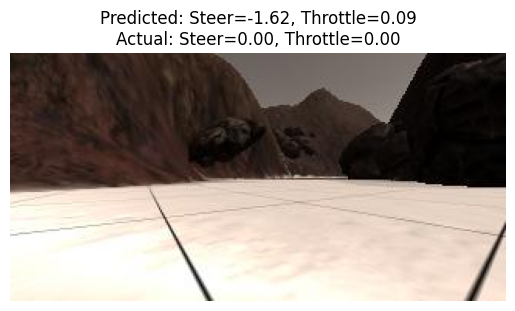

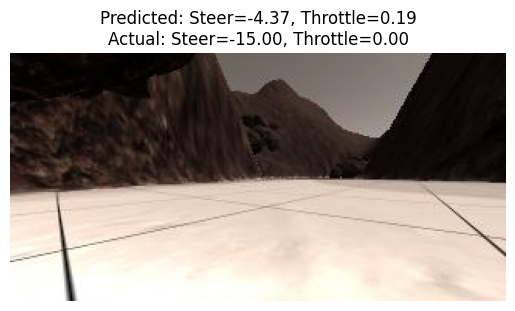

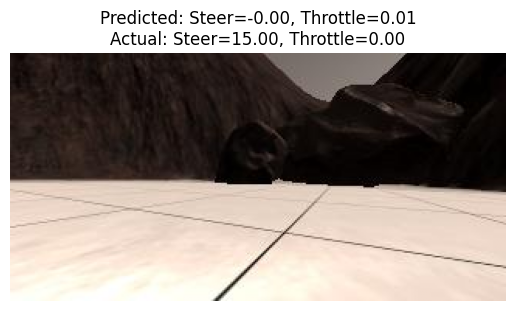

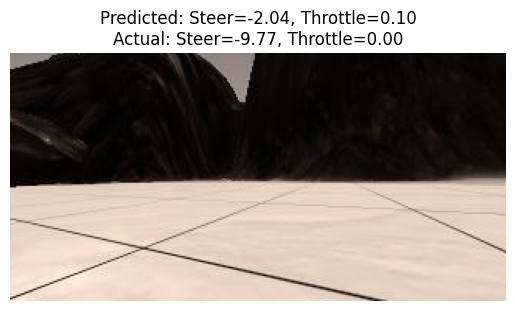

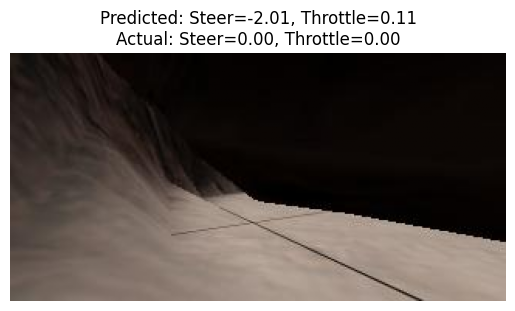

In [69]:
# Predict on test data
y_pred = model.predict(X_test)

# De-normalize (if needed)
predicted_steer = y_pred[:, 0] * 25.0
predicted_throttle = y_pred[:, 1]

actual_steer = y_test[:, 0] * 25.0
actual_throttle = y_test[:, 1]

# Plot a few sample predictions
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: Steer={predicted_steer[i]:.2f}, Throttle={predicted_throttle[i]:.2f}\n"
              f"Actual: Steer={actual_steer[i]:.2f}, Throttle={actual_throttle[i]:.2f}")
    plt.axis('off')
    plt.show()

Additionally Task:  Conduct another study on the effects of training data size on the performance of the model.

Previously we took 80% data for training-validation and for training it's 60%. So now we can try to take 80% 


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [72]:
model = Sequential([
    Input(shape=(160, 320, 3)),
    Conv2D(24, (5, 5), strides=(2, 2), activation='relu'),
    Conv2D(36, (5, 5), strides=(2, 2), activation='relu'),
    Conv2D(48, (5, 5), strides=(2, 2), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='relu'),
    Dense(2)  # output: [SteerAngle, Throttle]
])

model.compile(optimizer=Adam(1e-4), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 78, 158, 24)       1824      
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 77, 36)        21636     
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 37, 48)        43248     
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 35, 64)        27712     
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 33, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 27456)             0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [73]:
# 10% data for validation
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
model.save("rover_control_model.h7")

Epoch 1/10
23/23 [==============================] - 6s 229ms/step - loss: 0.1931 - val_loss: 0.1840
Epoch 2/10
23/23 [==============================] - 2s 98ms/step - loss: 0.1835 - val_loss: 0.1698
Epoch 3/10
23/23 [==============================] - 2s 103ms/step - loss: 0.1670 - val_loss: 0.1394
Epoch 4/10
23/23 [==============================] - 2s 105ms/step - loss: 0.1515 - val_loss: 0.1328
Epoch 5/10
23/23 [==============================] - 3s 115ms/step - loss: 0.1444 - val_loss: 0.1153
Epoch 6/10
23/23 [==============================] - 2s 103ms/step - loss: 0.1288 - val_loss: 0.0996
Epoch 7/10
23/23 [==============================] - 2s 105ms/step - loss: 0.1194 - val_loss: 0.0855
Epoch 8/10
23/23 [==============================] - 2s 100ms/step - loss: 0.1146 - val_loss: 0.0762
Epoch 9/10
23/23 [==============================] - 2s 103ms/step - loss: 0.1104 - val_loss: 0.0704
Epoch 10/10
23/23 [==============================] - 2s 102ms/step - loss: 0.1052 - val_loss: 0.0825


INFO:tensorflow:Assets written to: rover_control_model.h7/assets


3/3 [==============================] - 0s 12ms/step


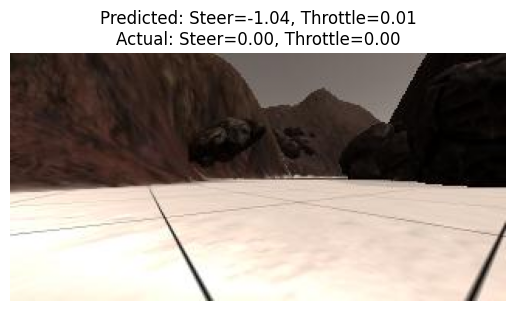

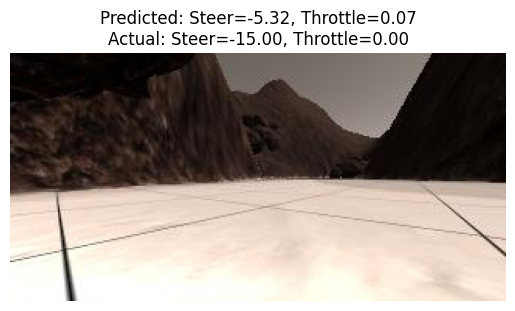

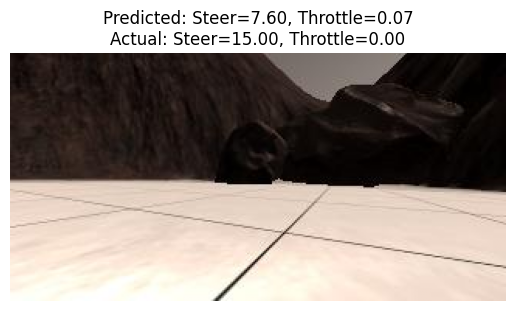

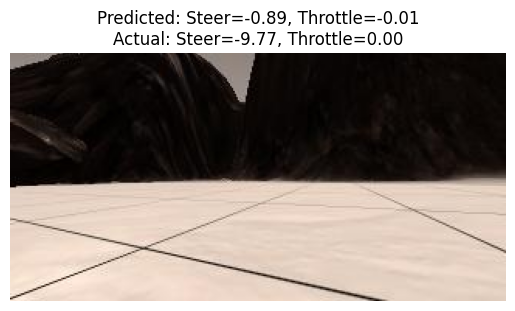

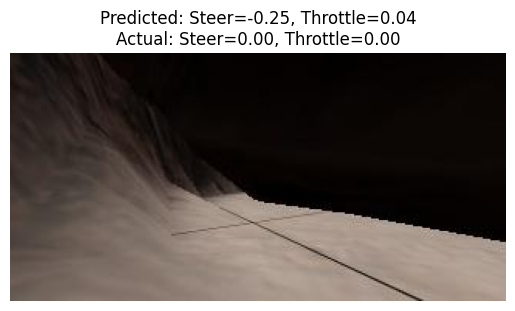

In [74]:
# Predict on test data
y_pred = model.predict(X_test)

# De-normalize (if needed)
predicted_steer = y_pred[:, 0] * 25.0
predicted_throttle = y_pred[:, 1]

actual_steer = y_test[:, 0] * 25.0
actual_throttle = y_test[:, 1]

# Plot a few sample predictions
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: Steer={predicted_steer[i]:.2f}, Throttle={predicted_throttle[i]:.2f}\n"
              f"Actual: Steer={actual_steer[i]:.2f}, Throttle={actual_throttle[i]:.2f}")
    plt.axis('off')
    plt.show()

Observation: When the training data is larger, model gets the better idea of data pattern and prediction is slightly close to actual data, however 10% is not making huge difference. 

In [76]:
!git remote add origin https://github.com/AngonaBiswas/ME-592_HW3_group.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any parent up to mount point /work)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /work)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /work)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
